In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../Lab1/fulldata.csv")
data.head()

,Unnamed: 0,lat_,lon_,State_,Ta_mean,Ta_min,Ta_max,Tsurf_mean,Tsurf_min,Tsurf_max,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,0,68.0926,16.3644,3,14.1,14.1,14.1,1.675000,1.61,1.74,...,36,63,69,0.0,1000,-5,10,152,17,kjopsvik
1,1,68.0926,16.3645,3,14.1,14.1,14.1,1.787778,1.55,1.98,...,36,63,69,0.0,1000,-5,10,152,17,kjopsvik
2,2,68.0926,16.3646,3,14.1,14.1,14.1,2.050000,2.05,2.05,...,36,63,69,0.0,1000,-5,10,152,17,kjopsvik
3,3,68.0926,16.3647,3,14.1,14.1,14.1,1.920000,1.92,1.92,...,36,63,69,0.0,1000,-5,10,152,17,kjopsvik
4,4,68.0926,16.3648,3,14.1,14.1,14.1,1.550000,1.55,1.55,...,36,63,69,0.0,1000,-5,10,152,17,kjopsvik


In [4]:
datas = data.sort_values(by = ['Date', 'Time'])

In [5]:
datas.head()

,Unnamed: 0,lat_,lon_,State_,Ta_mean,Ta_min,Ta_max,Tsurf_mean,Tsurf_min,Tsurf_max,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
159111,159111,68.4516,17.5419,3,11.487162,2.6,15.3,2.378784,-0.04,4.35,...,30,51,72,0.0,1007,1,10,149,15,oyjord
159112,159112,68.4516,17.5422,3,16.359036,2.9,19.5,4.018675,-1.14,5.91,...,30,51,72,0.0,1007,1,10,149,15,oyjord
159116,159116,68.4516,17.5426,3,14.879070,-6.4,19.7,3.796744,-7.30,6.31,...,30,51,72,0.0,1007,1,10,149,15,oyjord
159115,159115,68.4516,17.5425,3,18.413559,2.9,19.7,5.139068,0.10,6.28,...,30,51,72,0.0,1007,1,10,149,15,oyjord
159114,159114,68.4516,17.5424,3,15.258537,2.9,19.5,3.798537,-0.80,6.40,...,30,51,72,0.0,1007,1,10,149,15,oyjord


In [26]:
predictors = ['humidity', 'Speed_mean', 'pressure', 'Height_mean', 'FeelsLikeC', 'totalSnow_cm']
target = ['Friction_mean', 'Water_mean', 'Tsurf_mean']

In [7]:
datas['Time'].info

<bound method Series.info of 159111    06:51:34
159112    06:54:50
159116    06:55:02
159115    06:55:05
159114    06:55:06
            ...   
95245     15:22:00
95247     15:22:02
95248     15:22:04
95249     15:22:05
95250     15:22:06
Name: Time, Length: 196133, dtype: object>

In [10]:
pd.to_datetime(datas['date_time'])

159111   2020-11-30 06:00:00
159112   2020-11-30 06:00:00
159116   2020-11-30 06:00:00
159115   2020-11-30 06:00:00
159114   2020-11-30 06:00:00
                 ...        
95245    2021-03-03 15:00:00
95247    2021-03-03 15:00:00
95248    2021-03-03 15:00:00
95249    2021-03-03 15:00:00
95250    2021-03-03 15:00:00
Name: date_time, Length: 196133, dtype: datetime64[ns]

In [13]:
def getDateTime(row):
    return '-'.join(row['Date'].split('.')) + " " + row['Time']

In [27]:
times = pd.to_datetime(datas.apply(getDateTime, axis=1))

In [29]:
datas['times'] = times
datas_subs = datas[['times']+target+predictors]

In [104]:
fdata = datas_subs.resample("180S", on = 'times').mean()[:300]

<AxesSubplot: xlabel='times'>

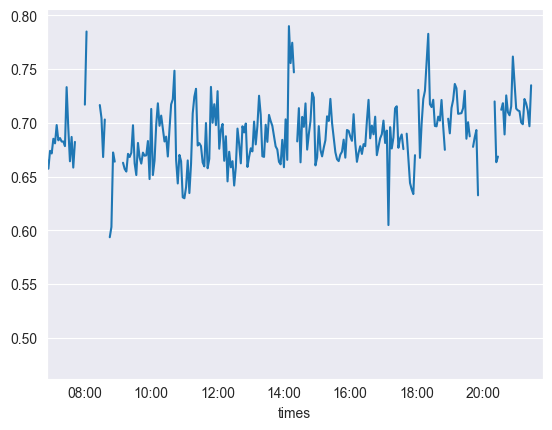

In [105]:
fdata['Friction_mean'].plot()

In [117]:
def rolling_fillna(series: pd.Series, window=3):
    ans = series
    for i in range(window,series.shape[0]):
        ans[i] = ans[(i-window):i].mean() if pd.isna(ans[i]) else ans[i]
    return ans

In [118]:
friction = rolling_fillna(fdata['Friction_mean'])
friction

times
2020-11-30 06:51:00    0.668041
2020-11-30 06:54:00    0.657400
2020-11-30 06:57:00    0.674035
2020-11-30 07:00:00    0.671570
2020-11-30 07:03:00    0.685286
                         ...   
2020-11-30 21:36:00    0.721624
2020-11-30 21:39:00    0.717165
2020-11-30 21:42:00    0.747000
2020-11-30 21:45:00    0.728596
2020-11-30 21:48:00    0.730920
Freq: 180S, Name: Friction_mean, Length: 300, dtype: float64

<AxesSubplot: xlabel='times'>

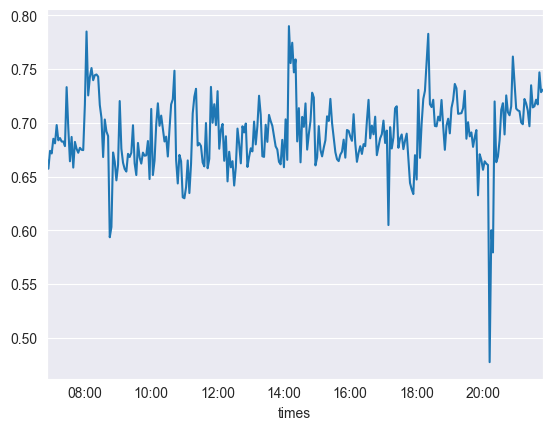

In [119]:
friction.plot()

<AxesSubplot: >

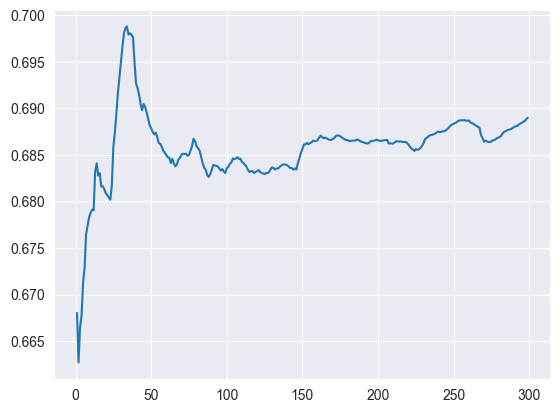

In [120]:
means = [friction[0:i].mean() for i in range(300)]
sns.lineplot(means)

<AxesSubplot: >

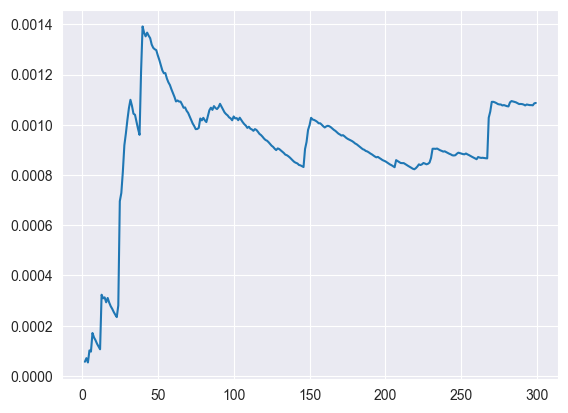

In [121]:
vars = [friction[0:i].var() for i in range(300)]
sns.lineplot(vars)

Тест Augmented Dickey-Fuller отвергает гипотезу о наличии единичного корня у ряда friction (не является нестационарным)

In [122]:
from statsmodels.tsa.stattools import adfuller
adfuller(x=friction)

(-6.378178890646754,
 2.256485259226536e-08,
 1,
 298,
 {'1%': -3.4524859843440754,
  '5%': -2.871288184343229,
  '10%': -2.571964047565425},
 -1229.8730630859934)

<AxesSubplot: xlabel='times'>

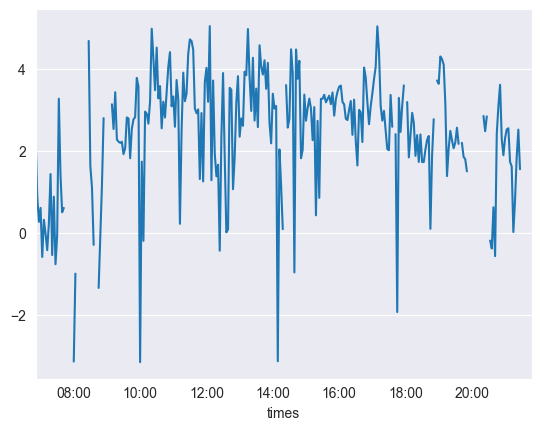

In [124]:
fdata['Tsurf_mean'].plot()

In [125]:
tsurf = rolling_fillna(fdata['Tsurf_mean'])
tsurf

times
2020-11-30 06:51:00    2.378784
2020-11-30 06:54:00    0.886534
2020-11-30 06:57:00    0.276387
2020-11-30 07:00:00    0.615723
2020-11-30 07:03:00   -0.580710
                         ...   
2020-11-30 21:36:00    1.852236
2020-11-30 21:39:00    1.949648
2020-11-30 21:42:00    2.232000
2020-11-30 21:45:00    2.011295
2020-11-30 21:48:00    2.064314
Freq: 180S, Name: Tsurf_mean, Length: 300, dtype: float64

<AxesSubplot: xlabel='times'>

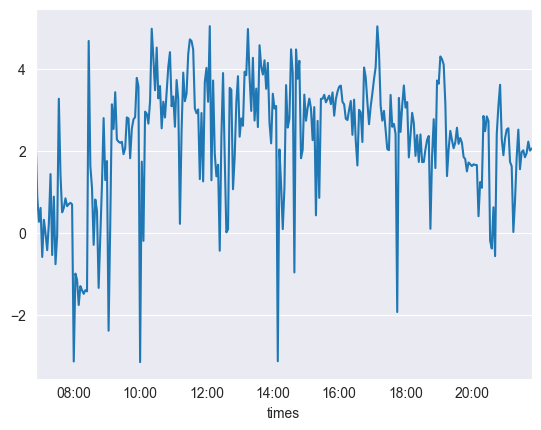

In [127]:
tsurf.plot()

<AxesSubplot: xlabel='times'>

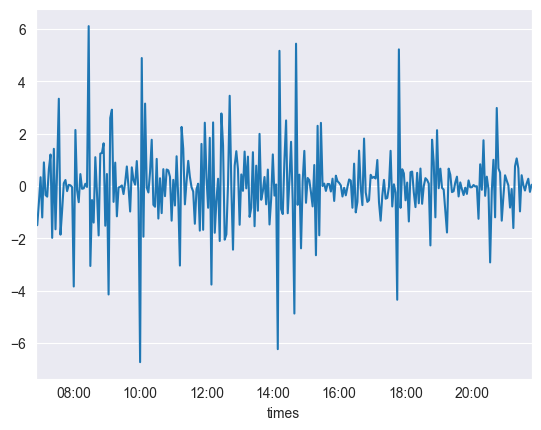

In [153]:
tsurf.diff().plot()

<AxesSubplot: >

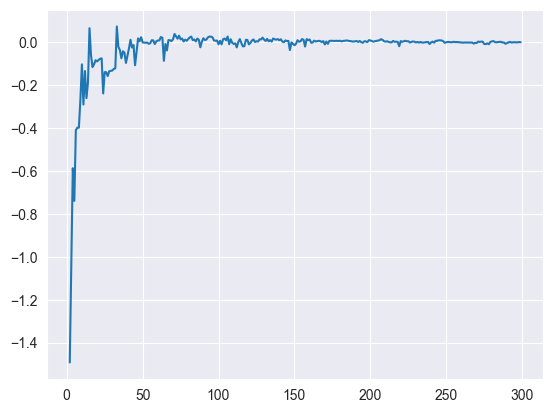

In [139]:
means = [tsurf.diff()[1:i].mean() for i in range(300)]
sns.lineplot(means)

<AxesSubplot: >

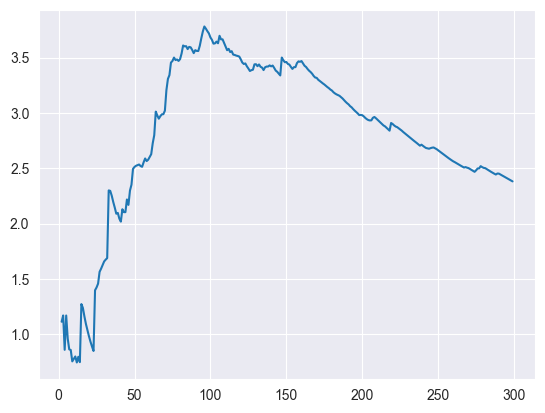

In [144]:
vars = [tsurf[0:i].var() for i in range(300)]
sns.lineplot(vars)

In [140]:
adfuller(tsurf.diff()[1:])

(-7.832455759208223,
 6.240437387737683e-12,
 12,
 286,
 {'1%': -3.4534232986669546,
  '5%': -2.8716994185534745,
  '10%': -2.5721833625116144},
 944.5417321770017)

<AxesSubplot: xlabel='times'>

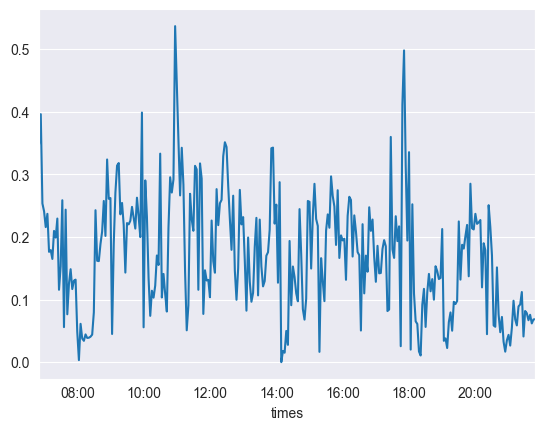

In [148]:
fdata['Water_mean'].plot()

(-5.383899913254932,
 3.6611701647833267e-06,
 2,
 297,
 {'1%': -3.4525611751768914,
  '5%': -2.87132117782556,
  '10%': -2.5719816428028888},
 -639.9528697880392)

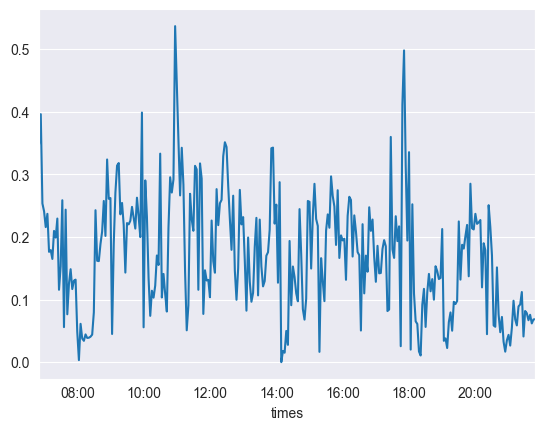

In [149]:
water = rolling_fillna(fdata['Water_mean'])
water.plot()
adfuller(water)

<AxesSubplot: >

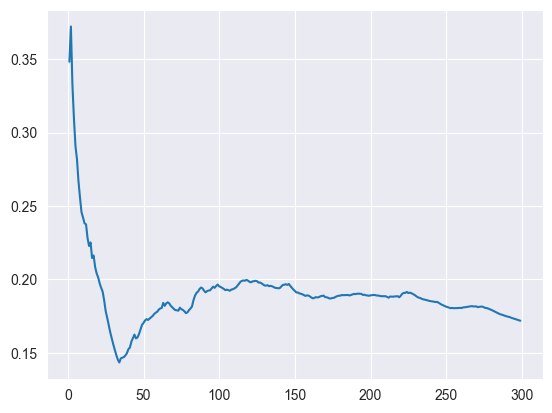

In [151]:
means = [water[0:i].mean() for i in range(300)]
sns.lineplot(means)

<AxesSubplot: >

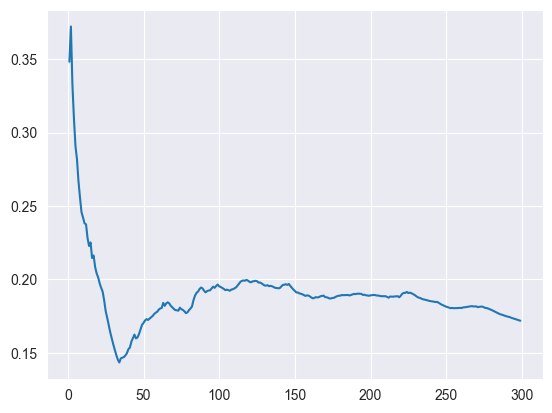

In [152]:
vars = [water[0:i].var() for i in range(300)]
sns.lineplot(means)

In [163]:
from statsmodels.tsa.stattools import acf, pacf, acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<AxesSubplot: >

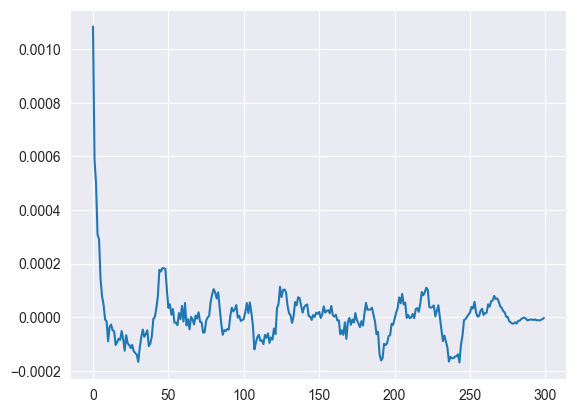

In [164]:
sns.lineplot(acovf(friction, fft=False))

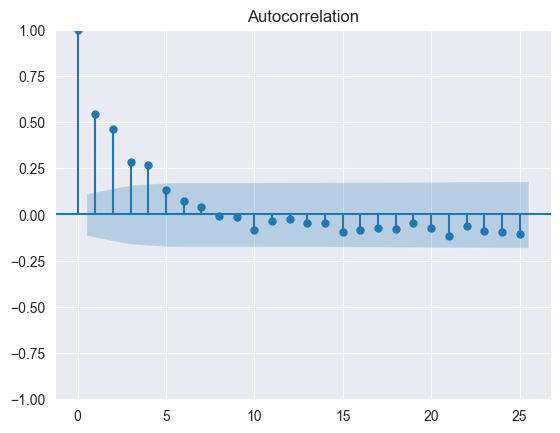

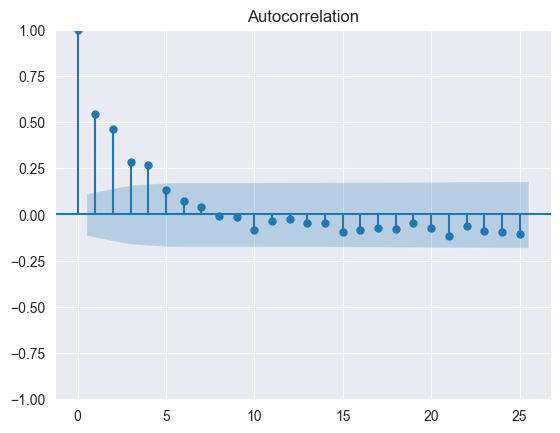

In [159]:
plot_acf(friction)

C:\ifmo\AlgoAnalysisDevelopment\venv\Scripts\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


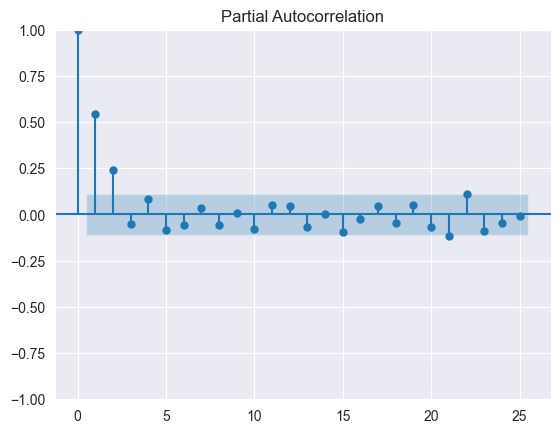

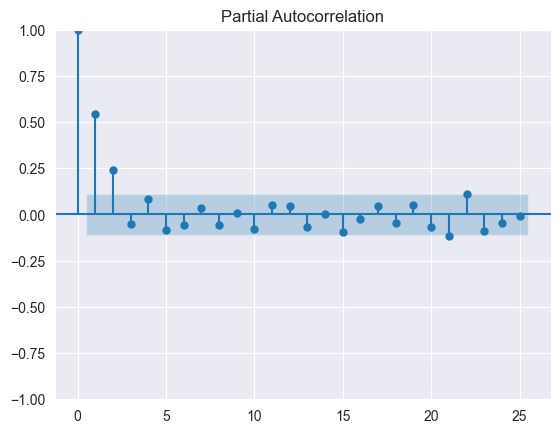

In [160]:
plot_pacf(friction)

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(friction.index).plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [165]:
from scipy import signal

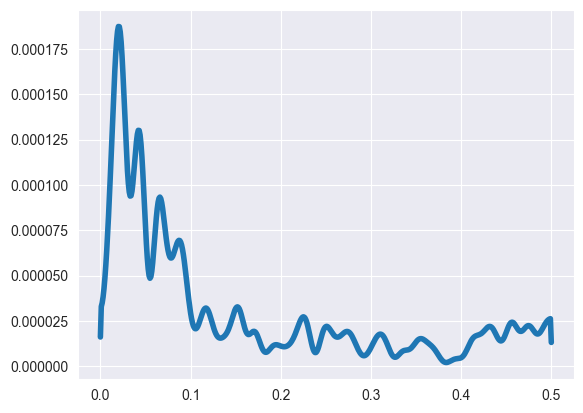

In [166]:
blackman = signal.windows.blackman(M=5)
f, Pxx_den = signal.welch(friction, fs=1, scaling='spectrum', nfft = 1000, nperseg=100)
plt.plot(f, Pxx_den, linewidth=4)